<a href="https://colab.research.google.com/github/Omayer-Ahmed/Deep-Learning/blob/main/Cat_Vs_Dog_Image_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downolad the data set

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-05-02 05:16:23--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.222.202.7, 2600:1408:9000:6ac::317f, 2600:1408:9000:68a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.222.202.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  81.9MB/s    in 8.8s    

2024-05-02 05:16:32 (89.6 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



#unzip the dataset

In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

#import modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

#Create Dataframe for Input and Output

In [ ]:
input_path=[]
label=[]

for class_name in os.listdir('PetImages'):
     #print(class_name)
     for path in os.listdir("PetImages/"+class_name):
         #print(path)
         if class_name == 'Cat':
            label.append(0)
         else:
            label.append(1)

         input_path.append(os.path.join("PetImages",class_name,path))
print(input_path[0],label[0])



PetImages/Cat/5722.jpg 0


In [ ]:
len(input_path)

25002

#Create Data Generator for the images

In [ ]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df.columns
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Dog/8945.jpg,1
1,PetImages/Dog/2485.jpg,1
2,PetImages/Dog/7426.jpg,1
3,PetImages/Cat/3926.jpg,0
4,PetImages/Dog/4337.jpg,1


In [ ]:
df['label']=df['label'].astype('str')

In [ ]:
df.head()

,images,label
0,PetImages/Dog/8945.jpg,1
1,PetImages/Dog/2485.jpg,1
2,PetImages/Dog/7426.jpg,1
3,PetImages/Cat/3926.jpg,0
4,PetImages/Dog/4337.jpg,1


In [ ]:
df['label'].value_counts()

label
1    12501
0    12501
Name: count, dtype: int64

#Exploratory Data Analysis

In [ ]:
import random
plt.figure(figsize=(25,25))
temp=df[df['label']==0]['images']
#print(temp)
start= random.randint(0,len(temp))
#print(start)
files= temp[start:start+25]
#print(files)

for index,file in enumerate(files):
    plt.subplot(5,5,index+1)
    img=load_img(file)
    #print(img)
    img=np.array(img)
    #print(img)
    plt.imshow(img)
    plt.title('Cat')

<Figure size 2500x2500 with 0 Axes>

In [ ]:
import random
plt.figure(figsize=(25,25))
temp=df[df['label']==1]['images']
#print(temp)
start= random.randint(0,len(temp))
#print(start)
files= temp[start:start+25]
#print(files)

for index,file in enumerate(files):
    plt.subplot(5,5,index+1)
    img=load_img(file)
    #print(img)
    img=np.array(img)
    #print(img)
    plt.imshow(img)
    plt.title('Dog')

<Figure size 2500x2500 with 0 Axes>

#delete those files that are not in ".jpg" format



In [ ]:
for i in df['images']:
    #print(i)
    if '.jpg' not in i:
         print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
#finding process which images are not working /loading.
import PIL
l=[]
for image in df['images']:
    try:
        img=PIL.Image.open(image)
        #print(img)

    except:
        #print("except",l.append(image))
        l.append(image)

l


['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [ ]:
#delete other files
df=df[df['images'] !='PetImages/Dog/Thumbs.db']
df=df[df['images'] !='PetImages/Cat/Thumbs.db']
df=df[df['images'] !='PetImages/Dog/11702.jpg']
df=df[df['images'] !='PetImages/Cat/666.jpg']

In [ ]:
df.shape

(24998, 2)

#Train Test Split the data

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=32)

In [ ]:
train.shape

(19998, 2)

In [ ]:
test.shape

(5000, 2)

In [ ]:
train.head()

,images,label
139,PetImages/Dog/9346.jpg,1
14558,PetImages/Dog/8455.jpg,1
15804,PetImages/Cat/3428.jpg,0
8736,PetImages/Cat/4231.jpg,0
1553,PetImages/Dog/12168.jpg,1


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator=ImageDataGenerator(
        rescale=1./255,#Normalization of image
        shear_range=0.2,#augmentation of images to avoid overfitting
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

val_generator =ImageDataGenerator( rescale=1./255)


train_iterator=train_generator.flow_from_dataframe(
        train,
        x_col='images',#name of file
        y_col='label',#name of class
        target_size=(128,128),#wight*height
        batch_size=512,# It specifies how many images will be processed at a time before updating the model's weights.
        class_mode='binary' #binary classification
)

val_iterator=val_generator.flow_from_dataframe(
        test,
        x_col='images',#name of file
        y_col='label',#name of class
        target_size=(128,128),#wight*height
        batch_size=512,# It specifies how many images will be processed at a time before updating the model's weights.
        class_mode='binary' #binary classification
)

#Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model=Sequential([
                  Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                  #Conv2D(no of filter,size(3*3),input_shape=(128*128)with color RGB)
                  MaxPool2D((2,2)),

                  Conv2D(32,(3,3),activation='relu'),
                  MaxPool2D((2,2)),

                  Conv2D(32,(3,3),activation='relu'),
                  MaxPool2D((2,2)),

                  Flatten(),#it connect CN layer with fully CL
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 32)       

In [ ]:
history=model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 448s 11s/step - loss: 0.7240 - accuracy: 0.5324 - val_loss: 0.6530 - val_accuracy: 0.6330
Epoch 2/10
40/40 [==============================] - 441s 11s/step - loss: 0.6329 - accuracy: 0.6435 - val_loss: 0.6069 - val_accuracy: 0.6762
Epoch 3/10
40/40 [==============================] - 447s 11s/step - loss: 0.5909 - accuracy: 0.6912 - val_loss: 0.5583 - val_accuracy: 0.7186
Epoch 4/10
40/40 [==============================] - 473s 12s/step - loss: 0.5368 - accuracy: 0.7318 - val_loss: 0.6697 - val_accuracy: 0.6596
Epoch 5/10
40/40 [==============================] - 434s 11s/step - loss: 0.5215 - accuracy: 0.7424 - val_loss: 0.4755 - val_accuracy: 0.7840
Epoch 6/10
40/40 [==============================] - 519s 13s/step - loss: 0.4861 - accuracy: 0.7663 - val_loss: 0.4659 - val_accuracy: 0.7816
Epoch 7/10
40/40 [==============================] - 472s 12s/step - loss: 0.4651 - accuracy: 0.7782 - val_loss: 0.4510 - val_accuracy: 0.7854
Epoch 

#visualization of Results


<Figure size 640x480 with 0 Axes>

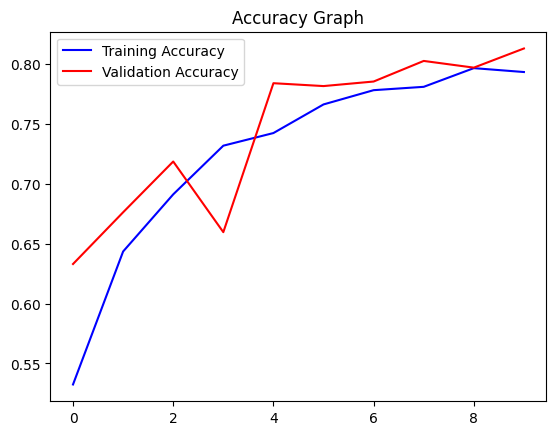

<Figure size 640x480 with 0 Axes>

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()



<Figure size 640x480 with 0 Axes>

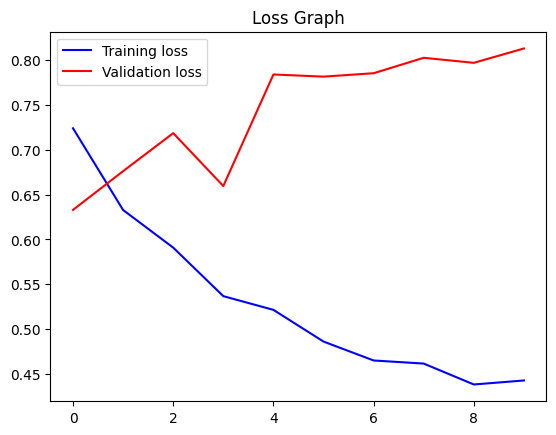

<Figure size 640x480 with 0 Axes>

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_acc,'r',label='Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()



*italicized text*# New Section